## Research Question: Predicting whether a currently "Live" will Succeed or Fail based on the projects which were previously "Successful" or "Failure



### Description of the data set:

###   In this project, the data set used is the Kickstarter data set,extracted from Kaggel website. Kickstarter is a funding platform for creative projects. Everything on kickstarter is a project. A project is a work with a clear goal that the creator wants to bring into life. Lets take a look at the attributes of the kickstarter data set.


  * **ID** :  It is the internal kickstarter id given to a project
  * **name** :  It is the name of the project
  * **Main category**:  Every project is put into a category
  * **Currency**:  The currency used to support the project
  * **category**:  Every project is further divided into sub categories
  * **deadline**:  It is the deadline for crowdfunding 
  * **goal**:  The funding goal is the amount of money that a creator needs to complete their project
  * **launched**:  The date when the project is launched
  * **pledged**:  It is the amount pledged by "crowd"
  * **state**:  Current condition of the project
  * **backers**:  number of backers ie., the crowd who is actually funding a project
  * **country**:  The country from where a pledge has been done
  * **usd pledged**:  amount of money pledged for a project in USD

## Data Extraction

In [1]:
#data extraction


#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 



#read kickstarter.csv file
kickstarter_data=pd.read_csv('kickstarter.csv',delimiter=',')

#converting into a dataframe
kickstarter_df=pd.DataFrame(kickstarter_data)

#print head of the data frame
kickstarter_df.head(5)



,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0


### Link which directs to kaggle website where the data set has been extracted from

In [ ]:
#link which directs to kaggle website where the data set has been extracted from
import webbrowser
webbrowser.open("https://www.kaggle.com/kemical/kickstarter-projects")

## Data Cleaning and Data Manipulation:

* The initial step of any project is to clean the data set. Firstly,the column names have been changed for better understanding of the data set. 

In [2]:
#data cleaning

#rename column names
kickstarter_df_renamed= kickstarter_df.rename(columns={'ID':'id',
                               'name':'name',
                               'category':'sub_category',
                               'main_category':'main_category',
                               'currency':'currency',
                               'deadline':'fund_deadline',
                               'goal':'goal_amount',
                               'launched':'project_launch',
                               'pledged':'pledged_amount',
                               'state':'project_state',
                               'backers':'backers',
                               'country':'country',
                               'usd pledged':'usd_pledged_amount'})

kickstarter_df_renamed.head(5)

,id,name,sub_category,main_category,currency,fund_deadline,goal_amount,project_launch,pledged_amount,project_state,backers,country,usd_pledged_amount
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0


* Here, the project launch attribute has been split into two different columns called project_launch_date and project_launch_time. Then the original project_launch column has been dropped. Also, the project launch_date attribute has been split into a different columns called project_launch_year

In [3]:
#splitting the project_launch column into two columns(project_launch_date and project_launch_time)
new= kickstarter_df_renamed["project_launch"].str.split(" ", n=1,expand = True) 
new.head()

#adding the two new columns(project_launch_date and project_launch_time) into the main data frame(kickstarter_df_renamed) and dropping the project_launch column 
kickstarter_df_renamed["project_launch_date"]=new[0]
kickstarter_df_renamed["project_launch_time"]=new[1]
kickstarter_df_renamed.drop(columns=["project_launch"],inplace=True)

#print the kickstarter data frame to see the modifications
kickstarter_df_renamed.head()

#splitting the project_launch_date column into another columns(project_launch_year)
new1= kickstarter_df_renamed["project_launch_date"].str.split("-", n=1,expand = True) 
new1.head()                           

#adding a new columns(project_launch_year) into the main data frame(kickstarter_df_renamed) 
kickstarter_df_renamed["project_launch_year"]=new1[0]
kickstarter_df_renamed.head()

,id,name,sub_category,main_category,currency,fund_deadline,goal_amount,pledged_amount,project_state,backers,country,usd_pledged_amount,project_launch_date,project_launch_time,project_launch_year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,0.0,failed,0,GB,0.0,2015-08-11,12:12:28,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.0,failed,15,US,100.0,2017-09-02,04:43:57,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,220.0,failed,3,US,220.0,2013-01-12,00:20:50,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,1.0,failed,1,US,1.0,2012-03-17,03:24:11,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,1283.0,canceled,14,US,1283.0,2015-07-04,08:35:03,2015


#### Structure of the data set
 *  The columns property is usually used to get the column names of the data frame. 

In [4]:
#structure of the data set


# print column names
print(kickstarter_df_renamed.columns)

Index(['id', 'name', 'sub_category', 'main_category', 'currency',
       'fund_deadline', 'goal_amount', 'pledged_amount', 'project_state',
       'backers', 'country', 'usd_pledged_amount', 'project_launch_date',
       'project_launch_time', 'project_launch_year'],
      dtype='object')


* The **shape** property is usually used to get the current shape of an array or data frame. In the data set which I selected, there are 65499 rows and 15 columns

In [5]:
#number of rows and columns
print(kickstarter_df_renamed.shape)

(65499, 15)


* The **dtypes** returns a Series with the data type of each column. 
* Here as we can observe,the dtype has resulted with a Series of data types for each column.

In [6]:
#checking the data types of all the columns
kickstarter_df_renamed.dtypes

id                       int64
name                    object
sub_category            object
main_category           object
currency                object
fund_deadline           object
goal_amount            float64
pledged_amount         float64
project_state           object
backers                  int64
country                 object
usd_pledged_amount     float64
project_launch_date     object
project_launch_time     object
project_launch_year     object
dtype: object


* The project_launch_year is of object data type which has to be converted to int type, and the project_launch_time and project_launch_date columns have to converted to timestamps

In [7]:
#changing the project_launch_year col data type from object to int type
kickstarter_df_renamed['project_launch_year'] = kickstarter_df_renamed.project_launch_year.astype(int)
kickstarter_df_renamed.dtypes

#changing the project_launch_date and project_launch_time cols data type from object to int datetime stamp
kickstarter_df_renamed['project_launch_date'] = pd.to_datetime(kickstarter_df_renamed['project_launch_date'])
kickstarter_df_renamed['project_launch_time'] = pd.to_datetime(kickstarter_df_renamed['project_launch_time'])
kickstarter_df_renamed.dtypes

id                              int64
name                           object
sub_category                   object
main_category                  object
currency                       object
fund_deadline                  object
goal_amount                   float64
pledged_amount                float64
project_state                  object
backers                         int64
country                        object
usd_pledged_amount            float64
project_launch_date    datetime64[ns]
project_launch_time    datetime64[ns]
project_launch_year             int64
dtype: object

* Pandas **describe()** is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.


In [8]:
kickstarter_df.describe()

,ID,goal,pledged,backers,usd pledged
count,6.549900e+04,6.549900e+04,6.549900e+04,65499.000000,6.486800e+04
mean,1.060407e+09,4.440623e+04,9.873487e+03,104.771722,7.155397e+03
std,3.310529e+08,1.033405e+06,8.804701e+04,798.264194,7.095684e+04
min,1.061440e+05,1.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.054676e+09,2.000000e+03,3.100000e+01,2.000000,2.000000e+01
50%,1.147808e+09,5.150000e+03,6.320000e+02,12.000000,4.010000e+02
75%,1.240741e+09,1.596250e+04,4.100000e+03,57.000000,3.050000e+03
max,1.333161e+09,1.000000e+08,8.596475e+06,85581.000000,8.596475e+06


In [9]:
#information of the data set
kickstarter_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 15 columns):
id                     65499 non-null int64
name                   65499 non-null object
sub_category           65499 non-null object
main_category          65499 non-null object
currency               65499 non-null object
fund_deadline          65499 non-null object
goal_amount            65499 non-null float64
pledged_amount         65499 non-null float64
project_state          65499 non-null object
backers                65499 non-null int64
country                65499 non-null object
usd_pledged_amount     64868 non-null float64
project_launch_date    65499 non-null datetime64[ns]
project_launch_time    65499 non-null datetime64[ns]
project_launch_year    65499 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(3), object(7)
memory usage: 7.5+ MB


* Check for null values and replace them with 0

In [10]:
#findind null values in the dataframe
print(kickstarter_df_renamed.isnull().sum())

id                       0
name                     0
sub_category             0
main_category            0
currency                 0
fund_deadline            0
goal_amount              0
pledged_amount           0
project_state            0
backers                  0
country                  0
usd_pledged_amount     631
project_launch_date      0
project_launch_time      0
project_launch_year      0
dtype: int64


In [11]:
#replacing null values with 0
kickstarter_df_renamed.fillna(0, inplace=True)
print(kickstarter_df_renamed.isnull().sum())

id                     0
name                   0
sub_category           0
main_category          0
currency               0
fund_deadline          0
goal_amount            0
pledged_amount         0
project_state          0
backers                0
country                0
usd_pledged_amount     0
project_launch_date    0
project_launch_time    0
project_launch_year    0
dtype: int64


## Data visualization

In [12]:
#count of main_category
main_category_count=pd.DataFrame(kickstarter_df_renamed.main_category.value_counts())



#resetting the indexes 
test = kickstarter_df_renamed.groupby('main_category').count()
main_category_df =pd.DataFrame(main_category_count.reset_index())
main_category_df.head()

#renaming column names of main_category_df
main_category_dataframe=main_category_df.rename(columns={'index':'main_category',
                               'main_category':'count'})
#print the head of main_category_dataframe
main_category_dataframe.head(5)


,main_category,count
0,Film & Video,10970
1,Music,8964
2,Publishing,6878
3,Games,6177
4,Technology,5656


### Bar plot representing the main categories of kickstarter projects

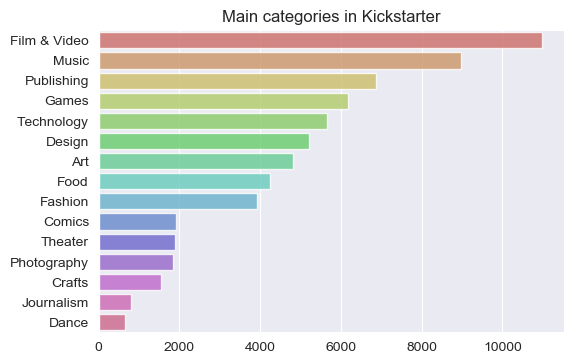

In [13]:

sns.set_style('darkgrid')
mains=kickstarter_df_renamed.main_category.value_counts()
x = mains.values
y = mains.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="hls", alpha=0.8)

plt.title('Main categories in Kickstarter')
plt.show()



### Bar plot representing the top 10 main categories of kickstarter projects

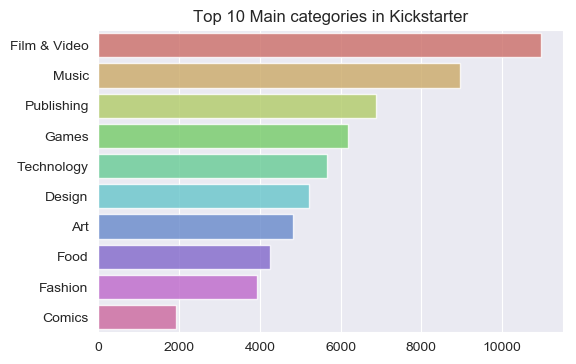

In [14]:
sns.set_style('darkgrid')
mains=kickstarter_df_renamed.main_category.value_counts().head(10)
x = mains.values
y = mains.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(x=x, y=y,palette="hls", alpha=0.8)

plt.title('Top 10 Main categories in Kickstarter')
plt.show()


### Plot representing the project state based on category

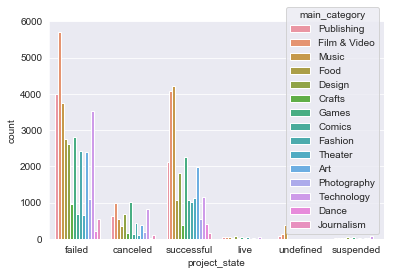

In [15]:
sns.countplot(x='project_state',hue='main_category',data=kickstarter_df_renamed)

In [16]:
#count the project_states
project_state_count=pd.DataFrame(kickstarter_df_renamed.project_state.value_counts())
project_state_count

#resetting the indexes
project_state_df =project_state_count.reset_index()
project_state_df


#renaming column names of project_state_df
project_state_dataframe=project_state_df.rename(columns={'index':'project_state',
                               'project_state':'count'})

#print the head of project_state_dataframe
project_state_dataframe.head()


,project_state,count
0,failed,34137
1,successful,23391
2,canceled,6593
3,undefined,589
4,live,470


### Pie chart representing the different project states of Kickstarter 

 * From the pie chart we can say that more than half of the projects have failed.

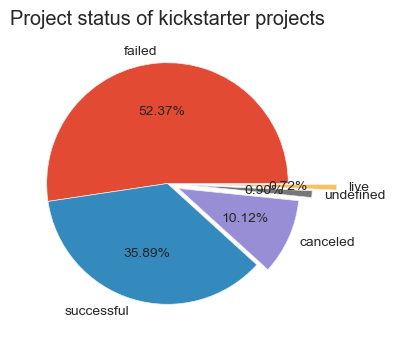

In [17]:
plt.style.use('ggplot')

fig, ax = plt.subplots(1, 1, dpi=100)
explode = [0,0,.1,.2, .4]
kickstarter_df_renamed.project_state.value_counts().head(5).plot.pie(autopct='%0.2f%%',
                                        explode=explode)

plt.title('Project status of kickstarter projects')
plt.ylabel('')
plt.show()

### Result:
#### Failed: 52.37%
#### Successful: 35.89%
#### Cancelled: 10.12%
#### Undefined: 0.90%
#### Live: 0.72%


## Barplot representing the successful project every year

Text(0.5, 1.0, 'Successful project per year')

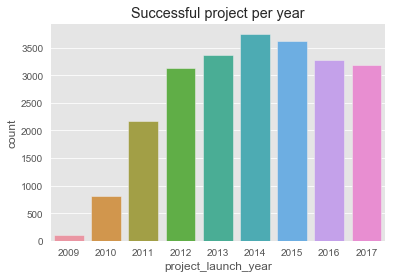

In [18]:
df=kickstarter_df_renamed.groupby(['project_launch_year','project_state']).size()
success_rate=pd.DataFrame(df.loc[(df.index.get_level_values('project_state') == 'successful')])
success_rate
#resetting the indexes
success_rate1=success_rate.reset_index()
success_rate1
#renaming column names of project_state_df
success_per_year=success_rate1.rename(columns={'project_launch_year':'project_launch_year',
                               'project_state':'project_state',0:'count'})

#print the head of project_state_dataframe

success_per_year.drop(columns=["project_state"],inplace=True)
success_per_year.head()

sns.barplot(x='project_launch_year',y='count',data=success_per_year.head(10)).set_title('Successful project per year')

### Result
#### We can observe that from 2009 to 2014 there is a drastic change in the number of successful projects. 2014 has the highest number of successful projects. Also, after 2014 there is a slight decrease in this number.

## Barplot representing the failed project every year

Text(0.5, 1.0, 'Failed projects per year')

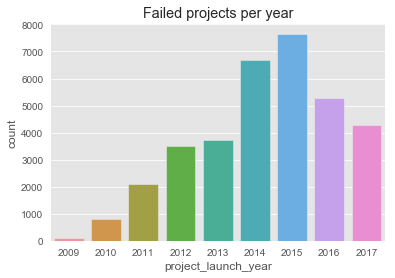

In [19]:
df1=kickstarter_df_renamed.groupby(['project_launch_year','project_state']).size()
fail_rate=pd.DataFrame(df1.loc[(df1.index.get_level_values('project_state') == 'failed')])
fail_rate
#resetting the indexes
fail_rate1=fail_rate.reset_index()
fail_rate1
#renaming column names of project_state_df
fail_per_year=fail_rate1.rename(columns={'project_launch_year':'project_launch_year',
                               'project_state':'project_state',0:'count'})

#print the head of project_state_dataframe

fail_per_year.drop(columns=["project_state"],inplace=True)
fail_per_year.head()

sns.barplot(x='project_launch_year',y='count',data=fail_per_year).set_title('Failed projects per year')

### Result
#### On the other hand the number of failed projects has also increased but in comaprision to the successful projects, the change is not drastic.

### Barplot representing the projects by country

Text(0.5, 1.0, 'Projects by country')

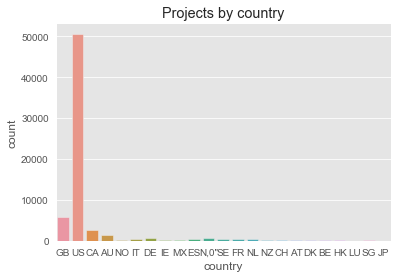

In [20]:
#bar plot for the countries where kickstarter projects
sns.countplot(x='country',data=kickstarter_df_renamed).set_title('Projects by country')


### Result:
#### The number of projects launched in the United States is very high when compared to other countries. As we can see,this number  is almost negligible for many countries.

### Box plot representing outliers of project state based on goal_amount

(0, 150000)

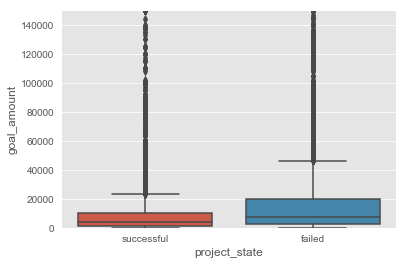

In [44]:
ax = sns.boxplot(x="project_state", y="goal_amount", data=kickstarter_df_renamed,
                 order=["successful", "failed"])

plt.ylim([0,150000])


### Result
#### As we can observe the mean goal amount of successful projects is very low and for the failed projects the mean goal amount is higher than that of successful projects. We can predict that if the goal amount is less then the project might be successful. 
#### Also we can see that there are many outilers for successful projects which means that the successful projects received funding more than the goal amount.

/Users/kishore/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of projects by year')

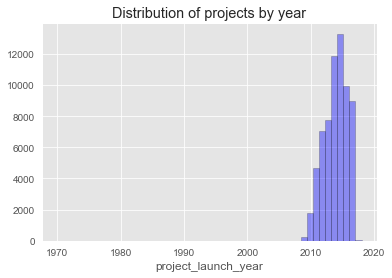

In [45]:
# seaborn histogram
sns.distplot(kickstarter_df_renamed['project_launch_year'], hist=True, kde=False, 
              color = 'blue',
             hist_kws={'edgecolor':'black'}).set_title("Distribution of projects by year")


### Distribution of goal amount of kickstarter projects

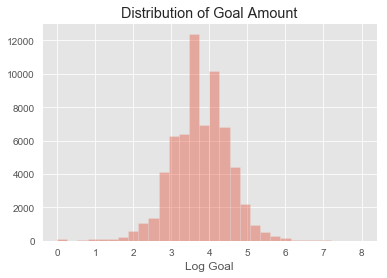

In [46]:
fig, ax = plt.subplots(1, 1)

g = sns.distplot(np.log10(kickstarter_df_renamed.goal_amount), kde=False, bins=30)

plt.xlabel('Log Goal')
plt.title('Distribution of Goal Amount')
plt.show()

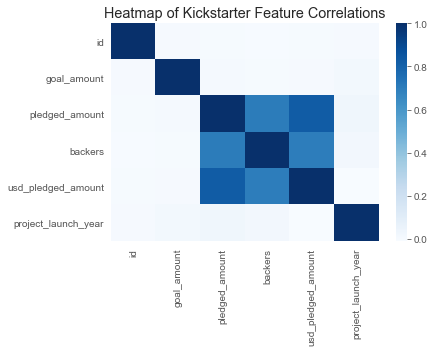

In [47]:


sns.heatmap(kickstarter_df_renamed.corr(), cmap='Blues')

plt.title('Heatmap of Kickstarter Feature Correlations')
plt.show()

In [58]:
#selecting observations with project state as successful and failure
success=pd.DataFrame(kickstarter_df_renamed[kickstarter_df_renamed['project_state'] == 'successful'])
                                    
failure=pd.DataFrame(kickstarter_df_renamed[kickstarter_df_renamed['project_state'] == 'failed'])
frames=[success,failure]
feature_variable=pd.concat(frames)

In [59]:

feature_variable.shape

(57528, 15)

In [67]:
#selecting the required features for training data set
feature_variable_train=feature_variable.loc[:,('project_launch_year','goal_amount','usd_pledged_amount','backers')]
feature_variable_train.head()
#feature variable for training data
feature_variable_train.shape


(57528, 4)

In [68]:
target_train=pd.DataFrame(feature_variable.loc[:,'project_state'])
target_train.head()

#target variable for training data
target_train.shape

(57528, 1)

In [69]:
#selecting observations with project state as live
live=pd.DataFrame(kickstarter_df_renamed[kickstarter_df_renamed['project_state'] == 'live'])
live.shape
#selecting the required features for testing data set
feature_variable_live=live.loc[:,('project_launch_year','goal_amount','usd_pledged_amount','backers')]
feature_variable_live.shape



(470, 4)

In [70]:
target_test=pd.DataFrame(live.loc[:,'project_state'])
target_test.shape



(470, 1)

### Predictive Analysis( KNN Classification Algorithm)
* Supervised learning as the name indicates a presence of supervisor. Basically supervised learning is a learning in which we teach or train the machine using data which is well labelled that means some data is already tagged with correct answer. After that, machine is provided with new set of examples(data) so that supervised learning algorithm analyses the training data(set of training examples) and produces correct outcome from labelled data.

In [71]:

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

X=feature_variable_train.values
y=target_train.values
knn =  KNeighborsClassifier(n_neighbors=120)
knn.fit(X,y)



# Predict the labels for the training data X
test_data_prediction = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(feature_variable_live)
print("Prediction: {}".format(new_prediction))

new_prediction.shape

/Users/kishore/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Prediction: ['failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'successful' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'successful' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'failed' 'successful' 'failed' 'failed' 'failed' 'failed' 'failed'
 'failed' 'failed' 'successful' 'failed' 'failed' 'failed' 'failed'
 'successful' 'failed' 'failed' 'successful' 'failed' 'failed' 'failed'
 'failed' 'failed' 'failed' 'failed' 'successful' 'failed' 'failed'
 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed' 'failed'
 'failed' 

(470,)

In [72]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
# Create training and test set

# create live projects data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
# Instantiate a k-NN classifier: knn
knn =  KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the training data
knn.fit(X_train,y_train)


# Predict the labels of the test data: y_pred
test_prediction = knn.predict(X_test)


print(knn.score(X_test, y_test))



/Users/kishore/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9422909786198506


### Comparing two models
* Along with the KNN Model, I also tested the accuracy with logistic regression



In [73]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
ss= StandardScaler()
lr=LogisticRegression()
lr_pipe=Pipeline((('scale',ss),('logreg',lr)))
lr_pipe.fit(X,y)
lr_pipe.score(X,y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)
lr_pipe.fit(X_train,y_train)
lr_pipe.score(X_test,y_test)


/Users/kishore/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kishore/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kishore/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kishore/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8365200764818356

### Depending on the feature variables taken in this project we can see that KNN algorithm gives an accuracy of 92% where as Logistic regression gives on 80%